Initial try for clustering

<ipython-input-4-72c7a36cd565>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected.dropna(inplace=True)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
<ipython-input-4-72c7a36cd565>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_selected['Cluster'] = clusters


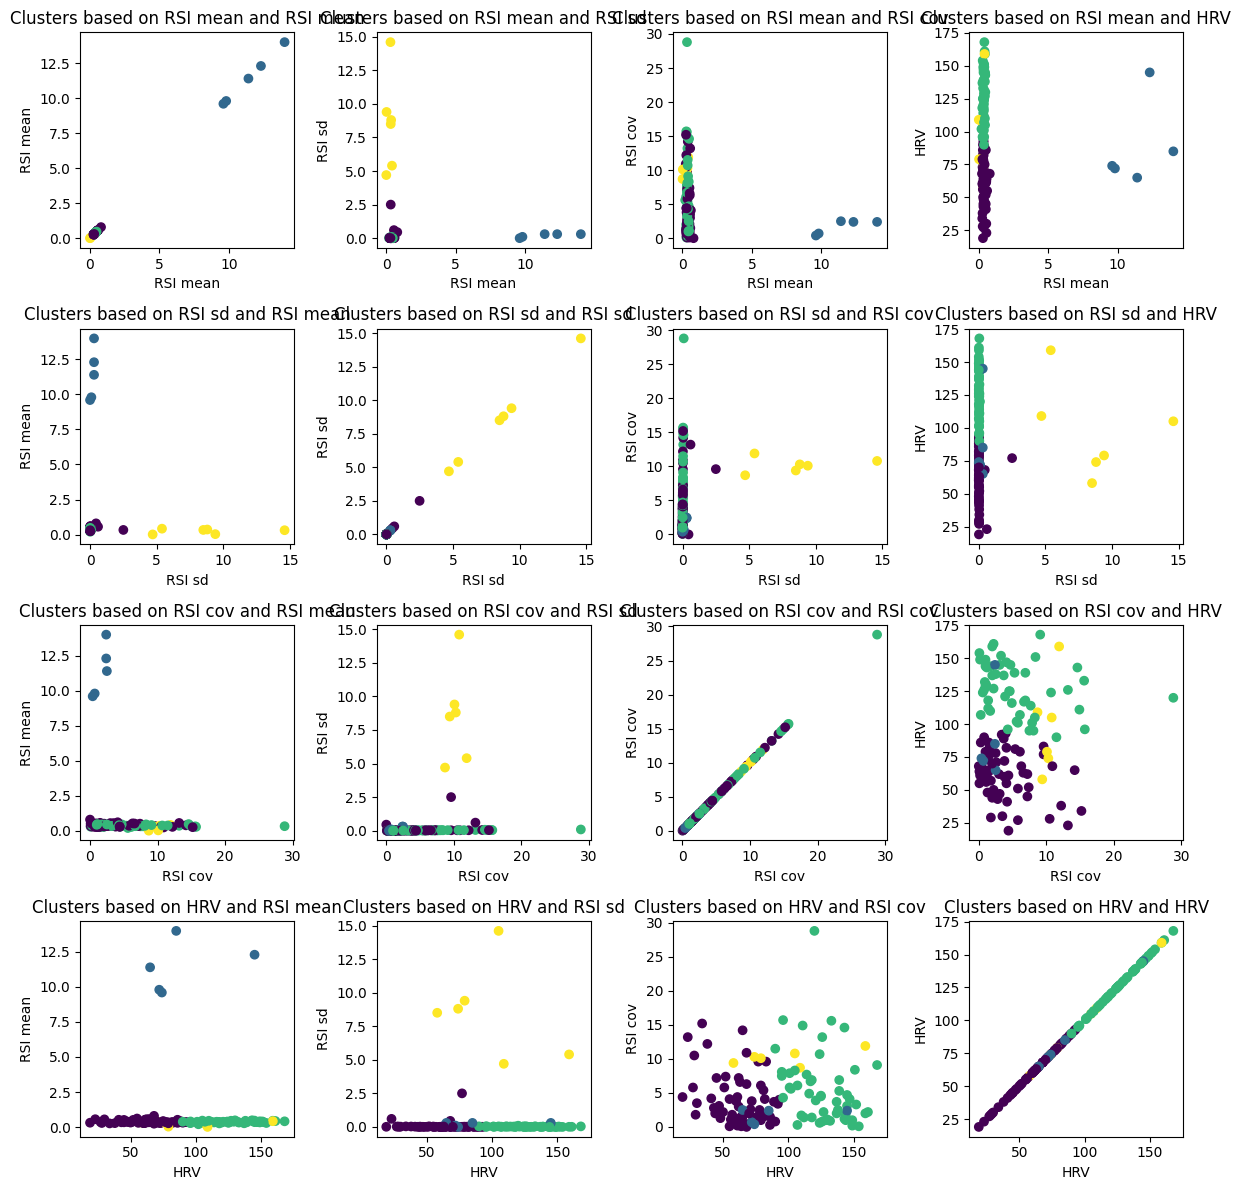

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Read the dataset
data = pd.read_csv("/content/Season 2 with Polar - Season 2 with Polar (1).csv")  # Replace "athlete_dataset.csv" with your actual dataset filename

# Select relevant columns
selected_columns = ["RSI mean", "RSI sd", "RSI cov", "HRV"]
data_selected = data[selected_columns]

# Handle missing values (if any)
data_selected.dropna(inplace=True)

# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_selected)

# Apply k-means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data_scaled)
clusters = kmeans.predict(data_scaled)

# Add cluster labels to the dataframe
data_selected['Cluster'] = clusters

# Calculate the number of dimensions and adjust the number of subplots accordingly
num_dimensions = len(selected_columns)
num_rows = num_dimensions
num_cols = num_dimensions

# Visualize the clusters
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 12))

# Plot clusters for all combinations of dimensions
for i, dim1 in enumerate(selected_columns):
    for j, dim2 in enumerate(selected_columns):
        ax = axs[i, j]
        ax.scatter(data_selected[dim1], data_selected[dim2], c=data_selected['Cluster'], cmap='viridis')
        ax.set_xlabel(dim1)
        ax.set_ylabel(dim2)
        ax.set_title(f'Clusters based on {dim1} and {dim2}')

plt.tight_layout()
plt.show()


Deleting the columns with > 50% null

In [ ]:
import pandas as pd

# Read every alternate row from the CSV file
input_file = "/content/Season 3.csv"
df = pd.read_csv(input_file, skiprows=lambda x: x % 2 != 0)

# Calculate the number of null values in each column
null_values_count_per_column = df.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage_per_column = (null_values_count_per_column / len(df)) * 100

# Create a DataFrame to display columns and their null percentages
null_info_df = pd.DataFrame({
    "Column Name": null_percentage_per_column.index,
    "Percentage of Null Values": null_percentage_per_column.values
})

# Set display options to show all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display columns with percentage of null values
print("Columns with percentage of null values:")
print(null_info_df)

# Find columns where the null percentage exceeds 80%
columns_to_drop = null_info_df[null_info_df["Percentage of Null Values"] > 50]["Column Name"].tolist()

# Exclude RSI.Mean, RSI.SD, and RSI.CoV from columns to drop
columns_to_drop = [col for col in columns_to_drop if col not in ["RSI.Mean", "RSI.SD", "RSI.CoV"]]

# Drop the columns from the DataFrame
df_dropped = df.drop(columns=columns_to_drop)

# Display the number of columns dropped and remaining features
print("\nNumber of columns dropped:", len(columns_to_drop))
print("Remaining features:", df_dropped.columns.tolist())


In [ ]:
import pandas as pd

# Read every alternate row from the CSV file
input_file = "season2.csv"
df = pd.read_csv(input_file)

# Calculate the number of null values in each column
null_values_count_per_column = df.isnull().sum()

# Calculate the percentage of null values in each column
null_percentage_per_column = (null_values_count_per_column / len(df)) * 100

# Create a DataFrame to display columns and their null percentages
null_info_df = pd.DataFrame({
    "Column Name": null_percentage_per_column.index,
    "Percentage of Null Values": null_percentage_per_column.values
})

# Set display options to show all columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Display columns with percentage of null values
print("Columns with percentage of null values:")
print(null_info_df)

# Find columns where the null percentage exceeds 80%
columns_to_drop = null_info_df[null_info_df["Percentage of Null Values"] > 50]["Column Name"].tolist()

# Exclude RSI.Mean, RSI.SD, and RSI.CoV from columns to drop
columns_to_drop = [col for col in columns_to_drop if col not in ["RSI mean", "RSI sd", "RSI cov"]]

# Drop the columns from the DataFrame
df_dropped = df.drop(columns=columns_to_drop)

# Display the number of columns dropped and remaining features
print("\nNumber of columns dropped:", len(columns_to_drop))
print("Remaining features:", df_dropped.columns.tolist())


keeping only the common columns

In [ ]:
import pandas as pd

# Function to find columns with null values greater than a threshold
def find_columns_with_null(csv_file, threshold):
    df = pd.read_csv(csv_file)
    null_percentages = (df.isnull().sum() / len(df)) * 100
    columns_to_drop = null_percentages[null_percentages > threshold].index.tolist()
    return set(df.columns) - set(columns_to_drop)

# Specify the CSV files
csv_file1 = "season2.csv"
csv_file2 = "season3.csv"

# Set the threshold for null values
threshold = 50

# Find columns with null values greater than the threshold for each CSV file
columns_file1 = find_columns_with_null(csv_file1, threshold)
columns_file2 = find_columns_with_null(csv_file2, threshold)

# Ensure that RSI.Mean, RSI.SD, and RSI.CoV are not removed
important_columns = {"RSI mean", "RSI sd", "RSI cov"}

# Find common columns from the remaining ones, including the important columns
common_columns = (columns_file1.intersection(columns_file2)).union(important_columns)

# Display common columns after removing columns with null values > 50%
print("Common columns after removing columns with null values > 50%:")
for column in common_columns:
    print(column)


Common columns after removing columns with null values > 50%:
Restorative.Sleep..hours.
Date
Hours.of.Sleep
Total.Cycle.Sleep.Time..hours.
HRV
Awake..hours.
RHR
Sleep.Need
Sleep.Score
Cycles
Latency..min.
REM.Sleep..hours.
Respiratory.Rate
Hours.in.Bed
Athlete
Light.Sleep..hours.
RSI sd
Sleep.Disturbances
Sleep.Efficiency....
RSI mean
Deep.Sleep..hours.
Sleep.Debt..hours.
Recovery
RSI cov


Scaling of season 3 cleaned output file data

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('season3.csv')

# Function to normalize the data
def normalize_data(data):
    normalized_data = (data - data.min()) / (data.max() - data.min())
    return normalized_data

# Normalize all numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns
df[numerical_columns] = df[numerical_columns].apply(normalize_data)

# Save the normalized data to a new CSV file
df.to_csv('normalized_data.csv', index=False)

print("Data normalization and saving to CSV completed.")


Data normalization and saving to CSV completed.


finding out the optimal k for k means clustering using elbow method and performing k means clustering

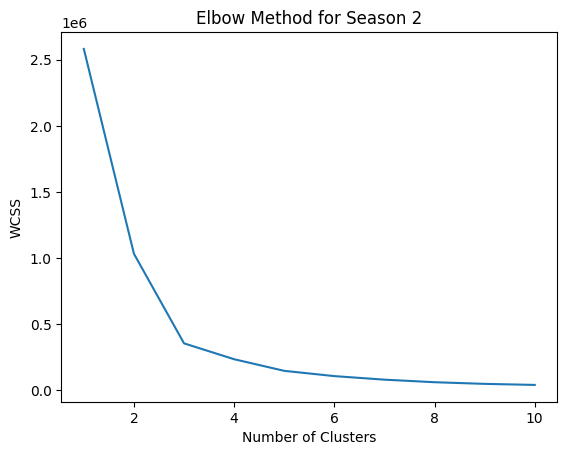

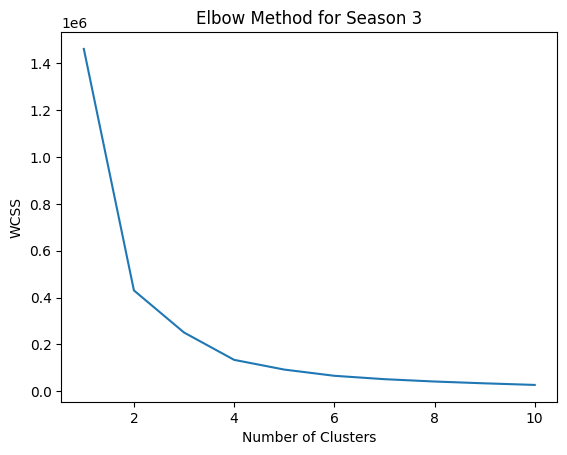

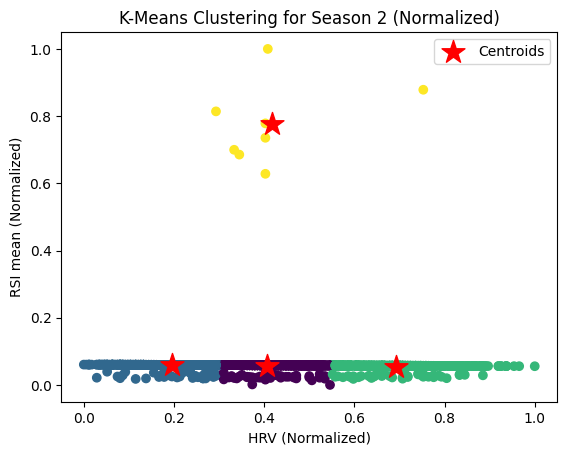

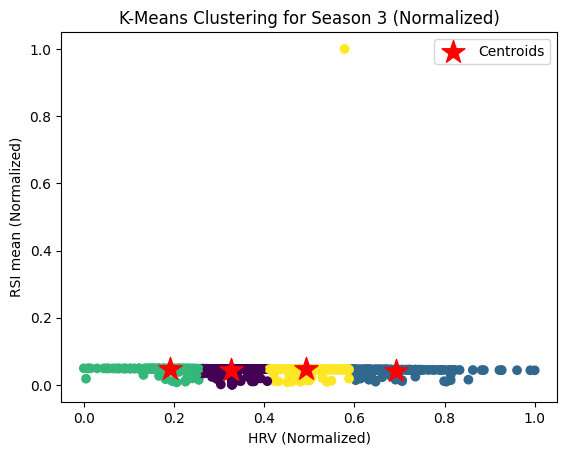

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
wcss_season2 = []
for i in range(1, 11):
    kmeans_season2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_season2.fit(season2_features_imputed)
    wcss_season2.append(kmeans_season2.inertia_)

# Plot the elbow curve for season 2
plt.plot(range(1, 11), wcss_season2)
plt.title('Elbow Method for Season 2')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the elbow curve for season 2, select the optimal number of clusters (let's say k=3)
k_season2 = 4



# Perform k-means clustering for season 3
wcss_season3 = []
for i in range(1, 11):
    kmeans_season3 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_season3.fit(season3_features_imputed)
    wcss_season3.append(kmeans_season3.inertia_)

# Plot the elbow curve for season 3
plt.plot(range(1, 11), wcss_season3)
plt.title('Elbow Method for Season 3')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the elbow curve for season 3, select the optimal number of clusters (let's say k=3)
k_season3 = 4

from sklearn.preprocessing import MinMaxScaler

# Normalize the imputed values for season 2
scaler_season2 = MinMaxScaler()
season2_features_normalized = scaler_season2.fit_transform(season2_features_imputed)

# Normalize the imputed values for season 3
scaler_season3 = MinMaxScaler()
season3_features_normalized = scaler_season3.fit_transform(season3_features_imputed)

# Perform k-means clustering for season 2 with normalized features
kmeans_season2_normalized = KMeans(n_clusters=k_season2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_season2_normalized = kmeans_season2_normalized.fit_predict(season2_features_normalized)

# Perform k-means clustering for season 3 with normalized features
kmeans_season3_normalized = KMeans(n_clusters=k_season3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_season3_normalized = kmeans_season3_normalized.fit_predict(season3_features_normalized)

# Plot the clustered data for season 2 with normalized features
plt.scatter(season2_features_normalized[:, 0], season2_features_normalized[:, 1], c=clusters_season2_normalized, cmap='viridis')
plt.scatter(kmeans_season2_normalized.cluster_centers_[:, 0], kmeans_season2_normalized.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering for Season 2 (Normalized)')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()
plt.show()

# Plot the clustered data for season 3 with normalized features
plt.scatter(season3_features_normalized[:, 0], season3_features_normalized[:, 1], c=clusters_season3_normalized, cmap='viridis')
plt.scatter(kmeans_season3_normalized.cluster_centers_[:, 0], kmeans_season3_normalized.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering for Season 3 (Normalized)')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()
plt.show()




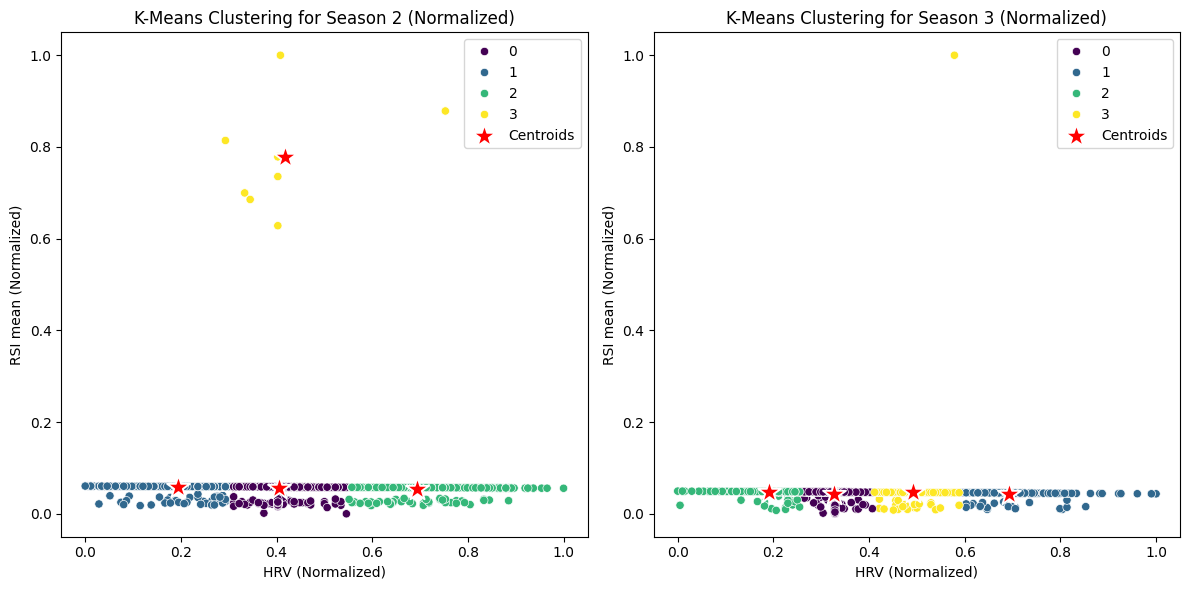

In [ ]:
from sklearn.cluster import KMeans
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("/content/Season 2  - Season 2 with Polar.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Normalize the imputed values for season 2
scaler_season2 = MinMaxScaler()
season2_features_normalized = scaler_season2.fit_transform(season2_features_imputed)

# Normalize the imputed values for season 3
scaler_season3 = MinMaxScaler()
season3_features_normalized = scaler_season3.fit_transform(season3_features_imputed)

# Perform k-means clustering for season 2 with normalized features
k_season2 = 4
kmeans_season2_normalized = KMeans(n_clusters=k_season2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_season2_normalized = kmeans_season2_normalized.fit_predict(season2_features_normalized)

# Perform k-means clustering for season 3 with normalized features
k_season3 = 4
kmeans_season3_normalized = KMeans(n_clusters=k_season3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_season3_normalized = kmeans_season3_normalized.fit_predict(season3_features_normalized)

# Plot the clustered data for season 2 with normalized features
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.scatterplot(x=season2_features_normalized[:, 0], y=season2_features_normalized[:, 1], hue=clusters_season2_normalized, palette='viridis')
sns.scatterplot(x=kmeans_season2_normalized.cluster_centers_[:, 0], y=kmeans_season2_normalized.cluster_centers_[:, 1], color='red', marker='*', s=300, label='Centroids')
plt.title('K-Means Clustering for Season 2 (Normalized)')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()

# Plot the clustered data for season 3 with normalized features
plt.subplot(1, 2, 2)
sns.scatterplot(x=season3_features_normalized[:, 0], y=season3_features_normalized[:, 1], hue=clusters_season3_normalized, palette='viridis')
sns.scatterplot(x=kmeans_season3_normalized.cluster_centers_[:, 0], y=kmeans_season3_normalized.cluster_centers_[:, 1], color='red', marker='*', s=300, label='Centroids')
plt.title('K-Means Clustering for Season 3 (Normalized)')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()

plt.tight_layout()
plt.show()




> Correlation matrix



<ipython-input-5-a369cbb354c8>:10: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


Correlation Matrix:
                      RHR       HRV  Recovery  Sleep.Score  Hours.in.Bed  \
RHR              1.000000 -0.576823 -0.495564    -0.142647     -0.102022   
HRV             -0.576823  1.000000  0.579846     0.073639      0.065078   
Recovery        -0.495564  0.579846  1.000000     0.486610      0.402563   
Sleep.Score     -0.142647  0.073639  0.486610     1.000000      0.845129   
Hours.in.Bed    -0.102022  0.065078  0.402563     0.845129      1.000000   
...                   ...       ...       ...          ...           ...   
Win             -0.082947 -0.029784 -0.026485     0.032747      0.068819   
uPER             0.373644 -0.210094  0.013899     0.227010      0.176262   
Pace.Adjustment  0.122966 -0.108133 -0.013528    -0.095860     -0.087987   
aPER             0.371796 -0.217616  0.007473     0.219956      0.172122   
PER             -0.371796  0.217616 -0.007473    -0.219956     -0.172122   

                 Hours.of.Sleep  Sleep.Need  Sleep.Efficiency....  

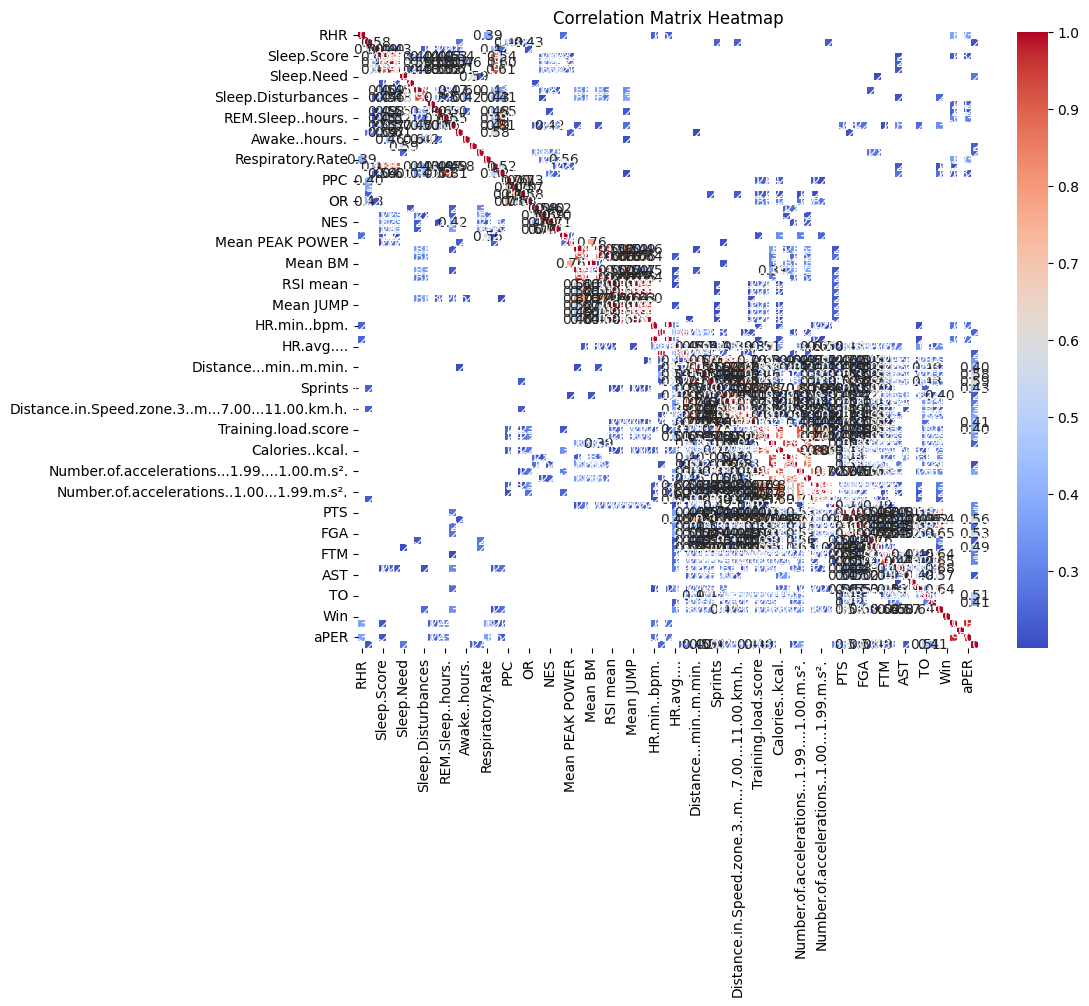

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def generate_correlation_matrix(csv_file):
    # Read CSV file into a pandas DataFrame
    data = pd.read_csv(csv_file)

    # Calculate correlation matrix
    correlation_matrix = data.corr()

    return correlation_matrix

# Replace 'your_file.csv' with the path to your CSV file
csv_file = '/content/normalized_data.csv'

# Generate correlation matrix
correlation_matrix = generate_correlation_matrix(csv_file)

print("Correlation Matrix:")
print(correlation_matrix)
# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt=".2f", mask=correlation_matrix < 0.2)
plt.title('Correlation Matrix Heatmap')
plt.show()


top 10

In [ ]:
import pandas as pd

def generate_top_correlations(csv_file, n=10):
    # Read CSV file into a pandas DataFrame
    data = pd.read_csv(csv_file)

    # Calculate correlation matrix
    correlation_matrix = data.corr().abs().unstack().sort_values(ascending=False)

    # Exclude self-correlations and duplicates
    correlation_matrix = correlation_matrix[correlation_matrix != 1].drop_duplicates()

    # Print top correlated elements
    print("Top", n, "correlated elements:")
    print(correlation_matrix.head(n))

# Replace 'your_file.csv' with the path to your CSV file
csv_file = '/content/normalized_data.csv'

# Generate top correlated elements
generate_top_correlations(csv_file)


Top 10 correlated elements:
PER              aPER            1.000000
 peak power cov  CoV BM          0.999999
HR.min....       HR.min..bpm.    0.999717
SD jump          RSI sd          0.998991
HR.max....       HR.max..bpm.    0.998684
RSI mean         Mean JUMP       0.996000
Mean JUMP        RSI sd          0.994003
                 SD jump         0.993082
RSI sd           RSI mean        0.990451
peak power mean  SD BM           0.989398
dtype: float64


<ipython-input-6-3d5380f14be9>:8: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr().abs().unstack().sort_values(ascending=False)


trying to make the clusters more well defined (checking their validity) and making the visualization better (getting 4 subdatasets)

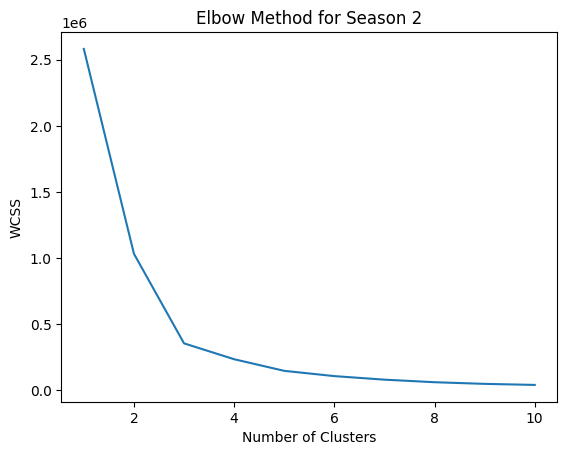

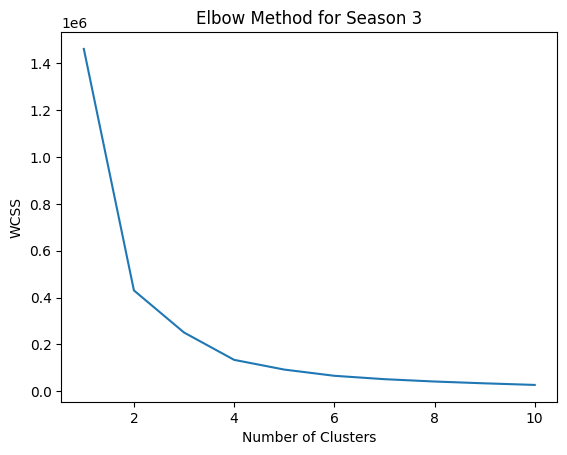

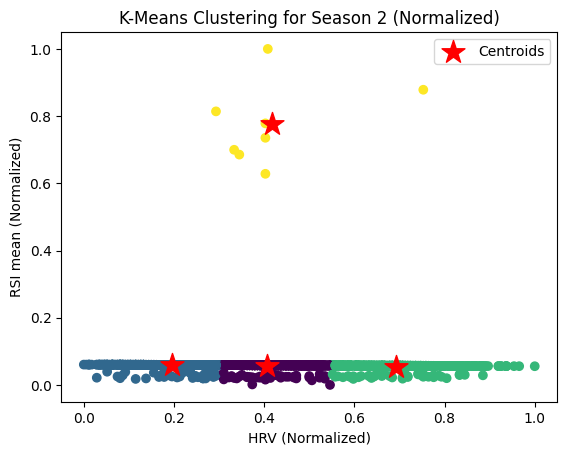

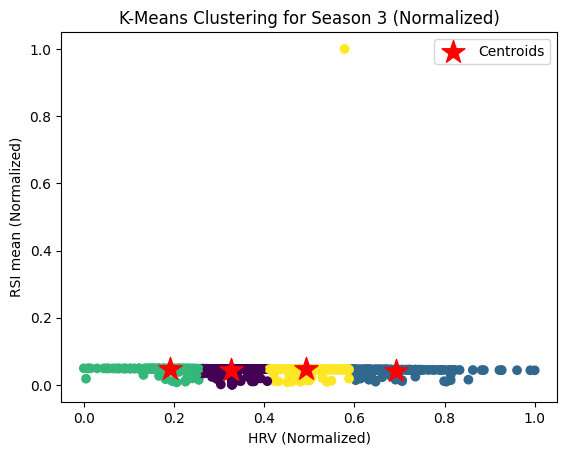

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
wcss_season2 = []
for i in range(1, 11):
    kmeans_season2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_season2.fit(season2_features_imputed)
    wcss_season2.append(kmeans_season2.inertia_)

# Plot the elbow curve for season 2
plt.plot(range(1, 11), wcss_season2)
plt.title('Elbow Method for Season 2')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the elbow curve for season 2, select the optimal number of clusters (let's say k=3)
k_season2 = 4



# Perform k-means clustering for season 3
wcss_season3 = []
for i in range(1, 11):
    kmeans_season3 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_season3.fit(season3_features_imputed)
    wcss_season3.append(kmeans_season3.inertia_)

# Plot the elbow curve for season 3
plt.plot(range(1, 11), wcss_season3)
plt.title('Elbow Method for Season 3')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the elbow curve for season 3, select the optimal number of clusters (let's say k=3)
k_season3 = 4

from sklearn.preprocessing import MinMaxScaler

# Normalize the imputed values for season 2
scaler_season2 = MinMaxScaler()
season2_features_normalized = scaler_season2.fit_transform(season2_features_imputed)

# Normalize the imputed values for season 3
scaler_season3 = MinMaxScaler()
season3_features_normalized = scaler_season3.fit_transform(season3_features_imputed)

# Perform k-means clustering for season 2 with normalized features
kmeans_season2_normalized = KMeans(n_clusters=k_season2, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_season2_normalized = kmeans_season2_normalized.fit_predict(season2_features_normalized)

# Perform k-means clustering for season 3 with normalized features
kmeans_season3_normalized = KMeans(n_clusters=k_season3, init='k-means++', max_iter=300, n_init=10, random_state=0)
clusters_season3_normalized = kmeans_season3_normalized.fit_predict(season3_features_normalized)

# Plot the clustered data for season 2 with normalized features
plt.scatter(season2_features_normalized[:, 0], season2_features_normalized[:, 1], c=clusters_season2_normalized, cmap='viridis')
plt.scatter(kmeans_season2_normalized.cluster_centers_[:, 0], kmeans_season2_normalized.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering for Season 2 (Normalized)')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()
plt.show()

# Plot the clustered data for season 3 with normalized features
plt.scatter(season3_features_normalized[:, 0], season3_features_normalized[:, 1], c=clusters_season3_normalized, cmap='viridis')
plt.scatter(kmeans_season3_normalized.cluster_centers_[:, 0], kmeans_season3_normalized.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering for Season 3 (Normalized)')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()
plt.show()




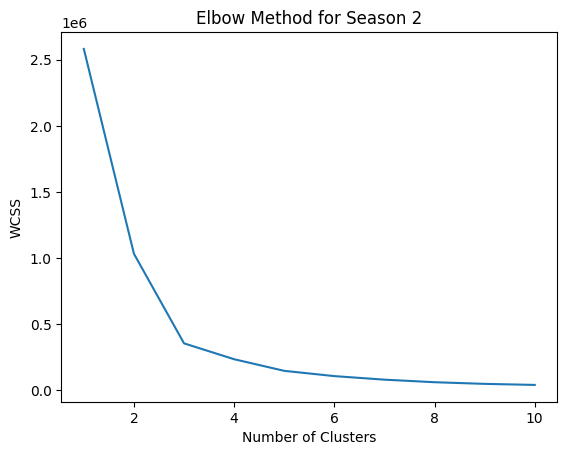

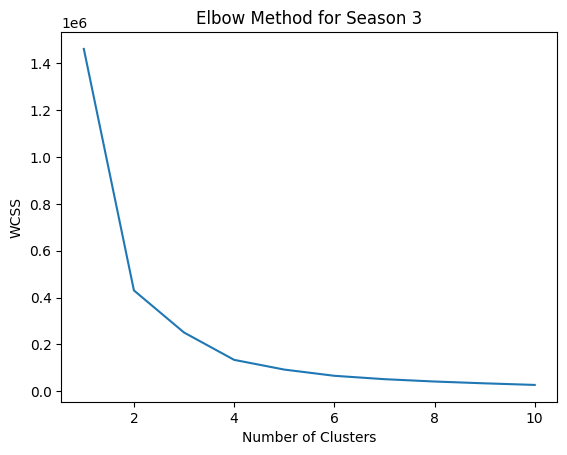

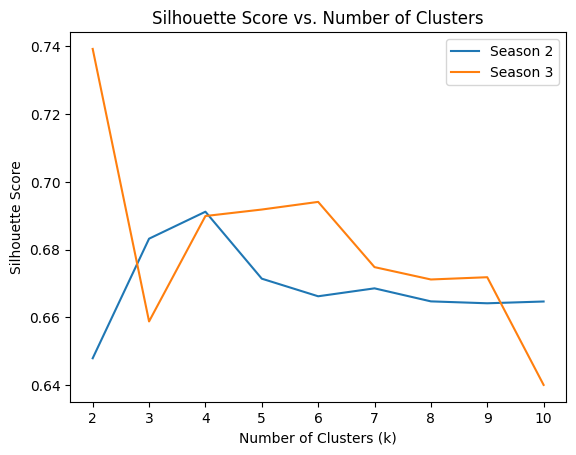

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from mpl_toolkits.mplot3d import Axes3D  # Importing 3D plotting library

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
wcss_season2 = []
for i in range(1, 11):
    kmeans_season2 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_season2.fit(season2_features_imputed)
    wcss_season2.append(kmeans_season2.inertia_)

# Plot the elbow curve for season 2
plt.plot(range(1, 11), wcss_season2)
plt.title('Elbow Method for Season 2')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the elbow curve for season 2, select the optimal number of clusters (let's say k=4)
k_season2 = 4

# Perform k-means clustering for season 3
wcss_season3 = []
for i in range(1, 11):
    kmeans_season3 = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans_season3.fit(season3_features_imputed)
    wcss_season3.append(kmeans_season3.inertia_)

# Plot the elbow curve for season 3
plt.plot(range(1, 11), wcss_season3)
plt.title('Elbow Method for Season 3')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')  # Within cluster sum of squares
plt.show()

# Based on the elbow curve for season 3, select the optimal number of clusters (let's say k=4)
k_season3 = 4

# Normalize the imputed values for season 2
scaler_season2 = MinMaxScaler()
season2_features_normalized = scaler_season2.fit_transform(season2_features_imputed)

# Normalize the imputed values for season 3
scaler_season3 = MinMaxScaler()
season3_features_normalized = scaler_season3.fit_transform(season3_features_imputed)

# Function to calculate silhouette score for different values of k
def calculate_silhouette_scores(data, max_k):
    silhouette_scores = []
    for k in range(2, max_k + 1):
        kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
        cluster_labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, cluster_labels))
    return silhouette_scores

# Calculate silhouette scores for a range of k values
max_k = 10
silhouette_scores_season2 = calculate_silhouette_scores(season2_features_normalized, max_k)
silhouette_scores_season3 = calculate_silhouette_scores(season3_features_normalized, max_k)

# Plot silhouette scores
plt.plot(range(2, max_k + 1), silhouette_scores_season2, label='Season 2')
plt.plot(range(2, max_k + 1), silhouette_scores_season3, label='Season 3')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score vs. Number of Clusters')
plt.legend()
plt.show()


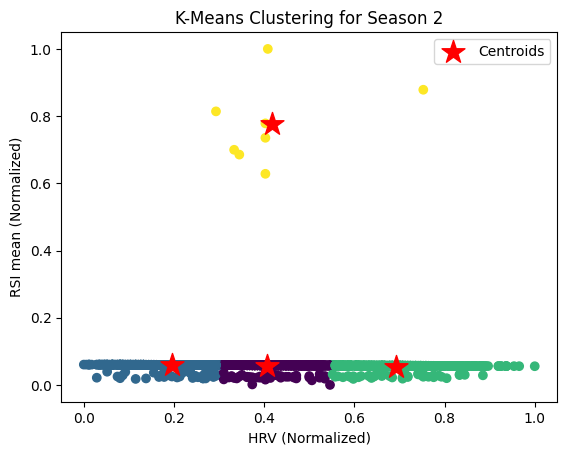

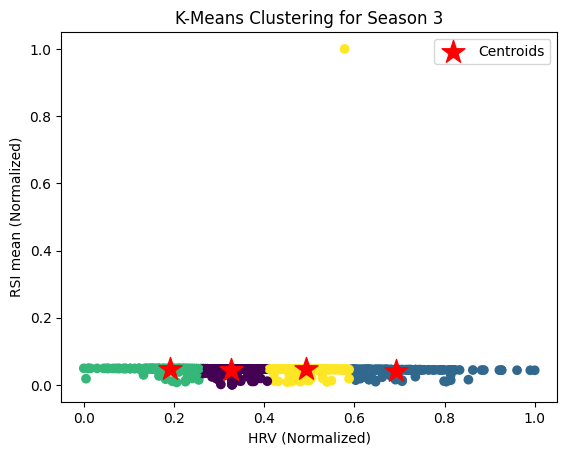

Silhouette Score for Season 2: 0.6911641831345935
Silhouette Score for Season 3: 0.6898906049106734


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Normalize the imputed values for season 2
scaler_season2 = MinMaxScaler()
season2_features_normalized = scaler_season2.fit_transform(season2_features_imputed)

# Normalize the imputed values for season 3
scaler_season3 = MinMaxScaler()
season3_features_normalized = scaler_season3.fit_transform(season3_features_imputed)

# Perform k-means clustering for season 2
kmeans_season2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season2_clusters = kmeans_season2.fit_predict(season2_features_normalized)

# Visualize the clusters for season 2
plt.scatter(season2_features_normalized[:, 0], season2_features_normalized[:, 1], c=season2_clusters, cmap='viridis')
plt.scatter(kmeans_season2.cluster_centers_[:, 0], kmeans_season2.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering for Season 2')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()
plt.show()

# Perform k-means clustering for season 3
kmeans_season3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season3_clusters = kmeans_season3.fit_predict(season3_features_normalized)

# Visualize the clusters for season 3
plt.scatter(season3_features_normalized[:, 0], season3_features_normalized[:, 1], c=season3_clusters, cmap='viridis')
plt.scatter(kmeans_season3.cluster_centers_[:, 0], kmeans_season3.cluster_centers_[:, 1], s=300, c='red', marker='*', label='Centroids')
plt.title('K-Means Clustering for Season 3')
plt.xlabel('HRV (Normalized)')
plt.ylabel('RSI mean (Normalized)')
plt.legend()
plt.show()

# Calculate silhouette scores for both seasons
silhouette_score_season2 = silhouette_score(season2_features_normalized, season2_clusters)
silhouette_score_season3 = silhouette_score(season3_features_normalized, season3_clusters)

print("Silhouette Score for Season 2:", silhouette_score_season2)
print("Silhouette Score for Season 3:", silhouette_score_season3)


getting 4 subdata sets for both the seasons

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
kmeans_season2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season2_clusters = kmeans_season2.fit_predict(season2_features_imputed)

# Perform k-means clustering for season 3
kmeans_season3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season3_clusters = kmeans_season3.fit_predict(season3_features_imputed)

# Add cluster labels to the original datasets
season2_data['Cluster'] = season2_clusters
season3_data['Cluster'] = season3_clusters

# Create subdatasets for each cluster in season 2
season2_subdatasets = []
for cluster_id in range(4):
    subdataset = season2_data[season2_data['Cluster'] == cluster_id].copy()
    season2_subdatasets.append(subdataset)

# Create subdatasets for each cluster in season 3
season3_subdatasets = []
for cluster_id in range(4):
    subdataset = season3_data[season3_data['Cluster'] == cluster_id].copy()
    season3_subdatasets.append(subdataset)

# Display the first few rows of each subdataset for season 2
for i, subdataset in enumerate(season2_subdatasets):
    print(f"Season 2 - Subdataset {i+1} (Cluster {i}):")
    print(subdataset.head())
    print("\n")

# Display the first few rows of each subdataset for season 3
for i, subdataset in enumerate(season3_subdatasets):
    print(f"Season 3 - Subdataset {i+1} (Cluster {i}):")
    print(subdataset.head())
    print("\n")


Season 2 - Subdataset 1 (Cluster 0):
                    Athlete      Date   RHR    HRV  Recovery  Sleep.Score  \
2   Athlete 11 Owusu-Mensah  9/6/2021  65.0  120.0      71.0         94.0   
3         Athlete 12 Porter  9/6/2021  52.0  107.0      83.0         85.0   
20        Athlete 12 Porter  9/7/2021  53.0  103.0      64.0         45.0   
29        Athlete 5 Jackson  9/7/2021  60.0  119.0      59.0         69.0   
40        Athlete 15 Tucker  9/8/2021  59.0  100.0      33.0         92.0   

    Hours.in.Bed  Hours.of.Sleep  Sleep.Need  Sleep.Efficiency....  ...  \
2           8.62            7.82        8.32                  91.0  ...   
3           8.14            7.22        8.46                  89.0  ...   
20          5.15            4.00        8.94                  78.0  ...   
29          7.38            6.30        9.12                  85.0  ...   
40          9.45            8.90        9.63                  94.0  ...   

    SD BM  CoV BM  RSI mean  RSI sd  RSI cov  Mea

appplying XGBoost model on each dataset

XGBOOST and Softmax similarity score to get the weighted equation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.special import softmax

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
kmeans_season2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season2_clusters = kmeans_season2.fit_predict(season2_features_imputed)

# Perform k-means clustering for season 3
kmeans_season3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season3_clusters = kmeans_season3.fit_predict(season3_features_imputed)

# Add cluster labels to the original datasets
season2_data['Cluster'] = season2_clusters
season3_data['Cluster'] = season3_clusters

# Create subdatasets for each cluster in season 2
season2_subdatasets = []
for cluster_id in range(4):
    subdataset = season2_data[season2_data['Cluster'] == cluster_id].copy()
    season2_subdatasets.append(subdataset)

# Create subdatasets for each cluster in season 3
season3_subdatasets = []
for cluster_id in range(4):
    subdataset = season3_data[season3_data['Cluster'] == cluster_id].copy()
    season3_subdatasets.append(subdataset)

# Define target variable
target_variable = 'RSI mean'  # You may need to adjust this depending on your dataset

# Define a function to train XGBoost model on each sub-dataset
def train_xgboost_models(subdatasets, features, target_variable):
    models = []
    for subdataset in subdatasets:
        subdataset = subdataset.dropna(subset=[target_variable])  # Drop rows with NaN in target variable
        model = xgb.XGBRegressor()
        model.fit(subdataset[features], subdataset[target_variable])
        models.append(model)
    return models

# Train XGBoost models on each sub-dataset for both seasons
season2_models = train_xgboost_models(season2_subdatasets, features, target_variable)
season3_models = train_xgboost_models(season3_subdatasets, features, target_variable)

# Define a function to calculate similarity score with each cluster centroid
def calculate_similarity(record, centroids):
    distances = np.linalg.norm(record - centroids, axis=1)
    return 1 / (1 + distances)

# Define a function to generate predictions using weighted averaging
def predict_weighted_average(record, models, centroids):
    similarity_scores = calculate_similarity(record, centroids)
    weights = softmax(similarity_scores)
    predictions = [model.predict(np.array([record]))[0] for model in models]
    weighted_predictions = np.average(predictions, weights=weights)
    return weighted_predictions

# Define a function to apply the weighted averaging to get the final RSI
def calculate_final_rsi(record, models, centroids):
    weighted_predictions = predict_weighted_average(record, models, centroids)
    return weighted_predictions

# Example usage:
new_record = {'HRV': 0.5, 'RSI mean': 0.6}  # Replace with actual values of new record
record_features = [new_record['HRV'], new_record['RSI mean']]

final_rsi_season2 = calculate_final_rsi(record_features, season2_models, kmeans_season2.cluster_centers_)
final_rsi_season3 = calculate_final_rsi(record_features, season3_models, kmeans_season3.cluster_centers_)

print("Final RSI for Season 2:", final_rsi_season2)
print("Final RSI for Season 3:", final_rsi_season3)

# 1. Obtain Original Missing Values
missing_indices_season2 = season2_features[features].isnull().any(axis=1)
missing_indices_season3 = season3_features[features].isnull().any(axis=1)

# 2. Impute Missing Values with Our Method
imputed_values_our_method_season2 = season2_features_imputed[missing_indices_season2]
imputed_values_our_method_season3 = season3_features_imputed[missing_indices_season3]

# 3. Impute Missing Values with MICE
from sklearn.impute import SimpleImputer

mice_imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy if needed
season2_features_imputed_mice = mice_imputer.fit_transform(season2_features[features])
season3_features_imputed_mice = mice_imputer.transform(season3_features[features])

imputed_values_mice_season2 = season2_features_imputed_mice[missing_indices_season2]
imputed_values_mice_season3 = season3_features_imputed_mice[missing_indices_season3]

# 4. Display and Compare
print("\nValues to be imputed using Our Method for Season 2:")
print(imputed_values_our_method_season2)

print("\nValues to be imputed using MICE for Season 2:")
print(imputed_values_mice_season2)

print("\nValues to be imputed using Our Method for Season 3:")
print(imputed_values_our_method_season3)

print("\nValues to be imputed using MICE for Season 3:")
print(imputed_values_mice_season3)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score, mean_absolute_error, mean_squared_error, r2_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.special import softmax

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
kmeans_season2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season2_clusters = kmeans_season2.fit_predict(season2_features_imputed)

# Perform k-means clustering for season 3
kmeans_season3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season3_clusters = kmeans_season3.fit_predict(season3_features_imputed)

# Add cluster labels to the original datasets
season2_data['Cluster'] = season2_clusters
season3_data['Cluster'] = season3_clusters

# Create subdatasets for each cluster in season 2
season2_subdatasets = []
for cluster_id in range(4):
    subdataset = season2_data[season2_data['Cluster'] == cluster_id].copy()
    season2_subdatasets.append(subdataset)

# Create subdatasets for each cluster in season 3
season3_subdatasets = []
for cluster_id in range(4):
    subdataset = season3_data[season3_data['Cluster'] == cluster_id].copy()
    season3_subdatasets.append(subdataset)

# Define target variable
target_variable = 'RSI mean'  # You may need to adjust this depending on your dataset

# Define a function to train XGBoost model on each sub-dataset
def train_xgboost_models(subdatasets, features, target_variable):
    models = []
    for subdataset in subdatasets:
        subdataset = subdataset.dropna(subset=[target_variable])  # Drop rows with NaN in target variable
        model = xgb.XGBRegressor()
        model.fit(subdataset[features], subdataset[target_variable])
        models.append(model)
    return models

# Train XGBoost models on each sub-dataset for both seasons
season2_models = train_xgboost_models(season2_subdatasets, features, target_variable)
season3_models = train_xgboost_models(season3_subdatasets, features, target_variable)

# Define a function to calculate similarity score with each cluster centroid
def calculate_similarity(record, centroids):
    distances = np.linalg.norm(record - centroids, axis=1)
    return 1 / (1 + distances)

# Define a function to generate predictions using weighted averaging
def predict_weighted_average(record, models, centroids):
    similarity_scores = calculate_similarity(record, centroids)
    weights = softmax(similarity_scores)
    predictions = [model.predict(np.array([record]))[0] for model in models]
    weighted_predictions = np.average(predictions, weights=weights)
    return weighted_predictions

# Define a function to apply the weighted averaging to get the final RSI
def calculate_final_rsi(record, models, centroids):
    weighted_predictions = predict_weighted_average(record, models, centroids)
    return weighted_predictions

# Example usage:
new_record = {'HRV': 0.5, 'RSI mean': 0.6}  # Replace with actual values of new record
record_features = [new_record['HRV'], new_record['RSI mean']]

final_rsi_season2 = calculate_final_rsi(record_features, season2_models, kmeans_season2.cluster_centers_)
final_rsi_season3 = calculate_final_rsi(record_features, season3_models, kmeans_season3.cluster_centers_)

print("Final RSI for Season 2:", final_rsi_season2)
print("Final RSI for Season 3:", final_rsi_season3)

# 1. Obtain Original Missing Values
missing_indices_season2 = season2_features[features].isnull().any(axis=1)
missing_indices_season3 = season3_features[features].isnull().any(axis=1)

# 2. Identify Rows Being Imputed
rows_imputed_season2 = season2_features[missing_indices_season2]
rows_imputed_season3 = season3_features[missing_indices_season3]

print("\nRows being imputed for Season 2:")
print(rows_imputed_season2)

print("\nRows being imputed for Season 3:")
print(rows_imputed_season3)

# 3. Impute Missing Values with MICE
mice_imputer = SimpleImputer(strategy='mean')  # You can adjust the strategy if needed
season2_features_imputed_mice = mice_imputer.fit_transform(season2_features[features])
season3_features_imputed_mice = mice_imputer.transform(season3_features[features])

imputed_values_mice_season2 = season2_features_imputed_mice[missing_indices_season2]
imputed_values_mice_season3 = season3_features_imputed_mice[missing_indices_season3]

print("\nValues imputed using MICE for Season 2:")
print(imputed_values_mice_season2)

print("\nValues imputed using MICE for Season 3:")
print(imputed_values_mice_season3)

# 4. Display and Compare Imputed Values
print("\nImputed values using Our Method for Season 2:")
print(season2_features_imputed[missing_indices_season2])

print("\nImputed values using Our Method for Season 3:")
print(season3_features_imputed[missing_indices_season3])

# 5. Evaluate the performance of both methods
print("\nEvaluation Metrics:")
print("MAE for Our Method (Season 2):", mean_absolute_error(imputed_values_mice_season2, season2_features_imputed[missing_indices_season2]))
print("MAE for Our Method (Season 3):", mean_absolute_error(imputed_values_mice_season3, season3_features_imputed[missing_indices_season3]))

print("RMSE for Our Method (Season 2):", mean_squared_error(imputed_values_mice_season2, season2_features_imputed[missing_indices_season2], squared=False))
print("RMSE for Our Method (Season 3):", mean_squared_error(imputed_values_mice_season3, season3_features_imputed[missing_indices_season3], squared=False))

print("R^2 for Our Method (Season 2):", r2_score(imputed_values_mice_season2, season2_features_imputed[missing_indices_season2]))
print("R^2 for Our Method (Season 3):", r2_score(imputed_values_mice_season3, season3_features_imputed[missing_indices_season3]))


In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.special import softmax

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
kmeans_season2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season2_clusters = kmeans_season2.fit_predict(season2_features_imputed)

# Perform k-means clustering for season 3
kmeans_season3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season3_clusters = kmeans_season3.fit_predict(season3_features_imputed)

# Add cluster labels to the original datasets
season2_data['Cluster'] = season2_clusters
season3_data['Cluster'] = season3_clusters

# Create subdatasets for each cluster in season 2
season2_subdatasets = []
for cluster_id in range(4):
    subdataset = season2_data[season2_data['Cluster'] == cluster_id].copy()
    season2_subdatasets.append(subdataset)

# Create subdatasets for each cluster in season 3
season3_subdatasets = []
for cluster_id in range(4):
    subdataset = season3_data[season3_data['Cluster'] == cluster_id].copy()
    season3_subdatasets.append(subdataset)

# Define target variable
target_variable = 'RSI mean'  # You may need to adjust this depending on your dataset

# Define a function to train XGBoost model on each sub-dataset
def train_xgboost_models(subdatasets, features, target_variable):
    models = []
    for subdataset in subdatasets:
        subdataset = subdataset.dropna(subset=[target_variable])  # Drop rows with NaN in target variable
        model = xgb.XGBRegressor()
        model.fit(subdataset[features], subdataset[target_variable])
        models.append(model)
    return models

# Train XGBoost models on each sub-dataset for both seasons
season2_models = train_xgboost_models(season2_subdatasets, features, target_variable)
season3_models = train_xgboost_models(season3_subdatasets, features, target_variable)

# Define a function to calculate similarity score with each cluster centroid
def calculate_similarity(record, centroids):
    distances = np.linalg.norm(record - centroids, axis=1)
    return 1 / (1 + distances)

# Define a function to generate predictions using weighted averaging
def predict_weighted_average(record, models, centroids):
    similarity_scores = calculate_similarity(record, centroids)
    weights = softmax(similarity_scores)
    predictions = [model.predict(np.array([record]))[0] for model in models]
    weighted_predictions = np.average(predictions, weights=weights)
    return weights, predictions, weighted_predictions

# Define a function to apply the weighted averaging to get the final RSI
def calculate_final_rsi(record, models, centroids):
    weights, predictions, weighted_predictions = predict_weighted_average(record, models, centroids)
    return weights, predictions, weighted_predictions

# Example usage:
new_record = {'HRV': 0.5, 'RSI mean': 0.6}  # Replace with actual values of new record
record_features = [new_record['HRV'], new_record['RSI mean']]

weights_season2, predictions_season2, final_rsi_season2 = calculate_final_rsi(record_features, season2_models, kmeans_season2.cluster_centers_)
weights_season3, predictions_season3, final_rsi_season3 = calculate_final_rsi(record_features, season3_models, kmeans_season3.cluster_centers_)

print("Final RSI for Season 2:", final_rsi_season2)
print("Final RSI for Season 3:", final_rsi_season3)

# Print weights and predictions for each cluster in season 2
for cluster_id, (weight, prediction) in enumerate(zip(weights_season2, predictions_season2)):
  print("season 2:")
  print(f"Cluster {cluster_id + 1} - Weight: {weight}, Prediction: {prediction}")

# Print weights and predictions for each cluster in season 3
for cluster_id, (weight, prediction) in enumerate(zip(weights_season3, predictions_season3)):
    print(f"Cluster {cluster_id + 1} - Weight: {weight}, Prediction: {prediction}")

# Save predicted values to CSV files
predicted_values_season2_df = pd.DataFrame(season2_features_imputed, columns=features)
predicted_values_season2_df['Athlete'] = season2_data['Athlete']
predicted_values_season2_df['Date'] = season2_data['Date']
predicted_values_season2_df.to_csv('predicted_values_season2.csv', index=False)

predicted_values_season3_df = pd.DataFrame(season3_features_imputed, columns=features)
predicted_values_season3_df['Athlete'] = season3_data['Athlete']
predicted_values_season3_df['Date'] = season3_data['Date']
predicted_values_season3_df.to_csv('predicted_values_season3.csv', index=False)


Final RSI for Season 2: 0.5092125019948113
Final RSI for Season 3: 0.5970152808742315
Cluster 1 - Weight: 0.24917866909212266, Prediction: 0.4587242007255554
Cluster 2 - Weight: 0.2486570194346259, Prediction: 0.4797873795032501
Cluster 3 - Weight: 0.25221577110129184, Prediction: 0.5704556703567505
Cluster 4 - Weight: 0.24994854037195963, Prediction: 0.5270196795463562
Cluster 1 - Weight: 0.25162169035539594, Prediction: 0.626056432723999
Cluster 2 - Weight: 0.24881610349142153, Prediction: 0.5480911731719971
Cluster 3 - Weight: 0.25020260179210685, Prediction: 0.6014286875724792
Cluster 4 - Weight: 0.24935960436107568, Prediction: 0.612099826335907


Comparison with standard methods like MICE

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import matplotlib.pyplot as plt
import xgboost as xgb
from scipy.special import softmax

# Load the preprocessed datasets for season 2 and season 3
season2_data = pd.read_csv("season2.csv")
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season2_features = season2_data[selected_columns]
season3_features = season3_data[selected_columns]

# Define the features to be used for clustering
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season2_features_imputed = imputer.fit_transform(season2_features[features])
season3_features_imputed = imputer.transform(season3_features[features])

# Perform k-means clustering for season 2
kmeans_season2 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season2_clusters = kmeans_season2.fit_predict(season2_features_imputed)

# Perform k-means clustering for season 3
kmeans_season3 = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
season3_clusters = kmeans_season3.fit_predict(season3_features_imputed)

# Add cluster labels to the original datasets
season2_data['Cluster'] = season2_clusters
season3_data['Cluster'] = season3_clusters

# Create subdatasets for each cluster in season 2
season2_subdatasets = []
for cluster_id in range(4):
    subdataset = season2_data[season2_data['Cluster'] == cluster_id].copy()
    season2_subdatasets.append(subdataset)

# Create subdatasets for each cluster in season 3
season3_subdatasets = []
for cluster_id in range(4):
    subdataset = season3_data[season3_data['Cluster'] == cluster_id].copy()
    season3_subdatasets.append(subdataset)

# Define target variable
target_variable = 'RSI mean'  # You may need to adjust this depending on your dataset

# Define a function to train XGBoost model on each sub-dataset
def train_xgboost_models(subdatasets, features, target_variable):
    models = []
    for subdataset in subdatasets:
        subdataset = subdataset.dropna(subset=[target_variable])  # Drop rows with NaN in target variable
        model = xgb.XGBRegressor()
        model.fit(subdataset[features], subdataset[target_variable])
        models.append(model)
    return models

# Train XGBoost models on each sub-dataset for both seasons
season2_models = train_xgboost_models(season2_subdatasets, features, target_variable)
season3_models = train_xgboost_models(season3_subdatasets, features, target_variable)

# Define a function to calculate similarity score with each cluster centroid
def calculate_similarity(record, centroids):
    distances = np.linalg.norm(record - centroids, axis=1)
    return 1 / (1 + distances)

# Define a function to generate predictions using weighted averaging
def predict_weighted_average(record, models, centroids):
    similarity_scores = calculate_similarity(record, centroids)
    weights = softmax(similarity_scores)
    predictions = [model.predict(np.array([record]))[0] for model in models]
    weighted_predictions = np.average(predictions, weights=weights)
    return weighted_predictions

# Define a function to apply the weighted averaging to get the final RSI
def calculate_final_rsi(record, models, centroids):
    weighted_predictions = predict_weighted_average(record, models, centroids)
    return weighted_predictions

# Example usage:
new_record = {'HRV': 0.5, 'RSI mean': 0.6}  # Replace with actual values of new record
record_features = [new_record['HRV'], new_record['RSI mean']]

final_rsi_season2 = calculate_final_rsi(record_features, season2_models, kmeans_season2.cluster_centers_)
final_rsi_season3 = calculate_final_rsi(record_features, season3_models, kmeans_season3.cluster_centers_)

print("Final RSI for Season 2:", final_rsi_season2)
print("Final RSI for Season 3:", final_rsi_season3)

# Save predicted values to CSV files
predicted_values_season2_df = pd.DataFrame(season2_features_imputed, columns=features)
predicted_values_season2_df['Athlete'] = season2_data['Athlete']
predicted_values_season2_df['Date'] = season2_data['Date']
predicted_values_season2_df.to_csv('predicted_values_season2.csv', index=False)

predicted_values_season3_df = pd.DataFrame(season3_features_imputed, columns=features)
predicted_values_season3_df['Athlete'] = season3_data['Athlete']
predicted_values_season3_df['Date'] = season3_data['Date']
predicted_values_season3_df.to_csv('predicted_values_season3.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Load the preprocessed dataset for season 3
season3_data = pd.read_csv("season3.csv")

# Select only the top 24 columns
selected_columns = [
    'Restorative.Sleep..hours.', 'Date', 'Hours.of.Sleep', 'Total.Cycle.Sleep.Time..hours.', 'HRV',
    'Awake..hours.', 'RHR', 'Sleep.Need', 'Sleep.Score', 'Cycles', 'Latency..min.', 'REM.Sleep..hours.',
    'Respiratory.Rate', 'Hours.in.Bed', 'Athlete', 'Light.Sleep..hours.', 'RSI sd', 'Sleep.Disturbances',
    'Sleep.Efficiency....', 'RSI mean', 'Deep.Sleep..hours.', 'Sleep.Debt..hours.', 'Recovery', 'RSI cov'
]

season3_features = season3_data[selected_columns]

# Define the features to be used for MICE imputation
features = ['HRV', 'RSI mean']

# Impute missing values using MICE
imputer = IterativeImputer()
season3_features_imputed_mice = imputer.fit_transform(season3_features[features])

# Create a DataFrame for the imputed values
imputed_values_mice_df = pd.DataFrame(season3_features_imputed_mice, columns=features)

# Add non-numeric columns (e.g., 'Date', 'Athlete') to the DataFrame
non_numeric_columns = ['Date', 'Athlete']
for column in non_numeric_columns:
    imputed_values_mice_df[column] = season3_features[column]

# Save the DataFrame to a CSV file
imputed_values_mice_df.to_csv('mice_error.csv', index=False)
